In [126]:
import pickle
import numpy as np
import math
from pathlib import Path
from matplotlib import pyplot as plt


# Donwload Dataset

# Reading Pickles

In [127]:

dataset_path = Path("./datasets/cifar10")
batches_path = [Path(f"./datasets/cifar10/data_batch_{i}") for i in range(1,6)]
 
batches_path

[WindowsPath('datasets/cifar10/data_batch_1'),
 WindowsPath('datasets/cifar10/data_batch_2'),
 WindowsPath('datasets/cifar10/data_batch_3'),
 WindowsPath('datasets/cifar10/data_batch_4'),
 WindowsPath('datasets/cifar10/data_batch_5')]

# Read One of the Batches

In [128]:
def read_batch(path):
    with open (path, "rb") as file:
        pickle_dict = pickle.load(file , encoding = "latin1")
    return pickle_dict        

In [129]:
selected_batch = batches_path[2]

pickle_dict = read_batch(selected_batch)

pickle_dict.keys()

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [130]:
pickle_dict['batch_label']

'training batch 3 of 5'

In [131]:
len(pickle_dict['labels'])

10000

In [132]:
pickle_dict['data'].shape

(10000, 3072)

In [133]:
len(pickle_dict['filenames'])

10000

# Show an Image of The Selected Batch

In [134]:
x=pickle_dict['data'][100,:]
x.max(), x.min()

(255, 4)

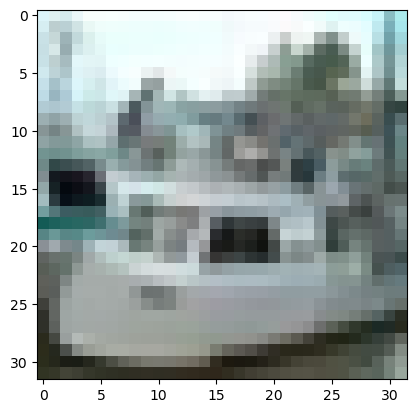

In [135]:
image = np.zeros((32,32,3), dtype=int) 
image [:,:,0] = x[:1024].reshape(32,32)
image [:,:,1] = x[1024:2048].reshape(32,32)
image [:,:,2] = x[2048:].reshape(32,32)

plt.imshow(image)

# Dataloader

In [137]:
class Cifar10DataLoader:
    def __init__(self, pickles_path, batch_size):
        self.data = list()
        self.labels = list()
        self.batch_size = batch_size
        self.read_batches(pickles_path)
        
    def read_pickle(self, path):
        with open (path, "rb") as file:
            pickle_dict = pickle.load(file , encoding = "latin1")
        return np.array(pickle_dict["labels"]), pickle_dict["data"]
    
    def read_batches(self, pickles_path):
        
        for path in pickles_path:
            path_label, path_data = self.read_pickle(path)
            self.data.append(path_data)
            self.labels.append(path_label)
            
        self.data = np.concatenate(self.data)  
        self.labels = np.concatenate(self.labels)  
        
    def get_batch(self,ix):
        start_ix = ix * self.batch_size
        end_ix = (ix+1)* self.batch_size
        if end_ix > self.data.shape[0]:
            end_ix = self.data.shape[0]
        
        batch_data = self.data[start_ix :end_ix , :]
        batch_labels = self.labels [ start_ix :end_ix ]
        
        return batch_data , batch_labels
    
    def get_num_batches(self):
        return math.ceil(self.data.shape[0] / self.batch_size)
        
        
    def get_item(self, ix):
        return self.data[ix,:],self.labels[ix]

In [138]:
dataset_path = Path("./datasets/cifar10")
batches_path = [Path(f"./datasets/cifar10/data_batch_{i}") for i in range(1,6)]
 
batches_path

[WindowsPath('datasets/cifar10/data_batch_1'),
 WindowsPath('datasets/cifar10/data_batch_2'),
 WindowsPath('datasets/cifar10/data_batch_3'),
 WindowsPath('datasets/cifar10/data_batch_4'),
 WindowsPath('datasets/cifar10/data_batch_5')]

In [139]:
cifar10 = Cifar10DataLoader(batches_path, 100)

In [140]:
x, y = cifar10.get_item(100)

x.shape, y.shape, y

((3072,), (), 8)

In [141]:
x

array([213, 211, 211, ..., 203, 213, 226], dtype=uint8)

In [142]:
X, Y = cifar10.get_batch(20)

X.shape, Y.shape

((100, 3072), (100,))